# Trabajo práctico integrador - Aprendizaje de Máquina I

## Carrera de Especialización en Inteligencia Artificial / 23Co2025

### Alumnos:

* Paola Andrea Blanco     **(a2303)**
* Facundo Manuel Quiroga  **(a2305)**
* Juan Manuel Fajardo     **(a2310)**
* Victor Gabriel Peralta  **(a2322)**
* Agustín Jesús Vazquez   **(e2301)**

## 1. Introducción y objetivo de trabajo

**Fuente de información de evaluación:** Utilizaremos el dataset [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package), el cual comprende aproximadamente 10 años de observaciones diarias del clima en numerosos lugares de Australia.

**Objetivo:** Queremos predecir si lloverá o no al día siguiente en función de datos meteorológicos del día actual, para integrar esta información en una aplicación meteorológica que beneficie al público.

## 2. Carga de datos y análisis exploratorio (EDA)

En esta sección cargamos el conjunto de datos original y realizamos un breve análisis exploratorio para entender su estructura, distribuciones y valores faltantes.

In [222]:
# Importamos librerías necesarias para el desarrollo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

# Semilla global
RANDOM_STATE = 42

In [223]:
# Cargar dataset
df = pd.read_csv('dataset/weatherAUS.csv')

In [224]:
# Dimensiones del conjunto de datos
print(f"Filas y columnas del dataset: {df.shape}")
# Muestra las primeras 5 filas para observar las columnas
display(df.head())

Filas y columnas del dataset: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [225]:
df.tail(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


El dataset original tiene 23 columnas y 145.460 filas, incluyendo variables numéricas continuas (temperaturas, precipitaciones, humedad, presión, etc.), variables categóricas (ubicación geográfica, dirección del viento, etc.), y una columna de fecha. La variable objetivo es RainTomorrow (indicador Sí/No de si llovió al día siguiente). El análisis inicial revela qué columnas tienen datos faltantes y en qué proporción.

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [227]:
# Estadísticas descriptivas básicas
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,145460,3436,2017-06-24,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,NaN,NaN,NaN,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,NaN,NaN,NaN,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,NaN,NaN,NaN,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,13.607062,6.0,31.0,39.0,48.0,135.0
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
# Contar valores faltantes por columna (top 10)
missing = df.isnull().sum().sort_values(ascending=False)
print("Valores faltantes por columna (top 10):")
print(missing.head(10))

Valores faltantes por columna (top 10):
Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
dtype: int64


In [229]:
# Distribución de la variable objetivo
df["RainTomorrow"].value_counts(normalize=True)


RainTomorrow
No     0.775819
Yes    0.224181
Name: proportion, dtype: float64

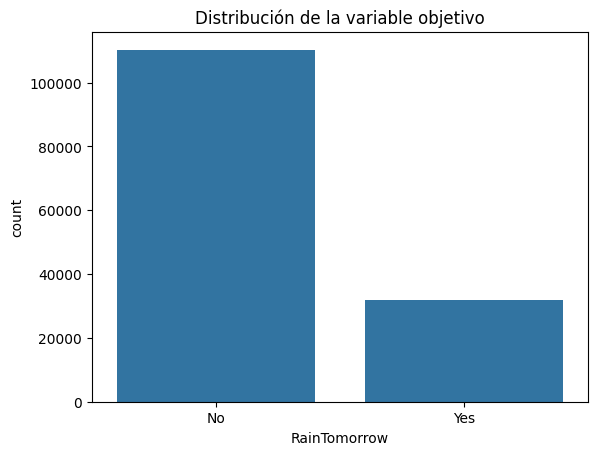

In [230]:
sns.countplot(x="RainTomorrow", data=df)
plt.title("Distribución de la variable objetivo")
plt.show()


Observamos que la variable objetivo está ligeramente desbalanceada, con una proporción mayor de "No" respecto de "Yes". Esto es esperable en un dataset meteorológico, ya que la mayoría de los días no llueve. Este desbalance será tenido en cuenta al evaluar el modelo.

## 2. Preprocesamiento de los datos

En esta sección dejamos el dataset listo para entrenar modelos de clasificación. Los pasos principales son:

1. Eliminar las filas que no tienen valor en la variable objetivo `RainTomorrow`.
2. Transformar la fecha en una representación cíclica del mes (`Month_sin`, `Month_cos`).
3. Eliminar columnas que ya no aportan información directa al modelo (`Date`, `Year`, `Month`).
4. Identificar qué columnas son numéricas y cuáles categóricas.
5. Separar las variables predictoras (X) de la variable objetivo (y).
6. Realizar la partición estratificada en conjuntos de entrenamiento y test.

- Eliminación de columnas con alto porcentaje de datos faltantes.
- Manejo de filas con valores nulos (incluyendo la eliminación de aquellas sin valor en la variable objetivo).
- Imputación de valores faltantes en columnas numéricas con valores estadísticos (mediana).
- Transformación de variables categóricas a variables numéricas mediante *one-hot encoding*.
- Escalado de las características numéricas para que queden en rangos comparables.


### 2.1 Eliminación de filas sin valor en `RainTomorrow`

La variable `RainTomorrow` es nuestra variable objetivo (target). Algunas filas del dataset original no contienen información sobre si llovió o no al día siguiente (es decir, `RainTomorrow` es `NaN`).

Estas filas no pueden utilizarse para entrenar un modelo supervisado, ya que el algoritmo necesita conocer la clase verdadera para aprender. Por este motivo, se eliminan todas las filas donde `RainTomorrow` es `NaN`, en lugar de imputar su valor, ya que imputar la etiqueta introduciría ruido artificial en la variable que precisamente queremos predecir.


In [231]:
# 1) Eliminar filas donde la variable objetivo RainTomorrow es NaN

print("Filas antes de eliminar NaN en RainTomorrow:", len(df))
print("NaN en RainTomorrow:", df["RainTomorrow"].isna().sum())

df = df.dropna(subset=["RainTomorrow"])

print("Filas después de eliminar NaN en RainTomorrow:", len(df))
print("NaN en RainTomorrow:", df["RainTomorrow"].isna().sum())


Filas antes de eliminar NaN en RainTomorrow: 145460
NaN en RainTomorrow: 3267
Filas después de eliminar NaN en RainTomorrow: 142193
NaN en RainTomorrow: 0


### 2.2 Transformación de la información temporal

A partir de la columna `Date` derivamos dos tipos de información:

- El **mes** de la observación (Month).
- El **año** (Year).

Sin embargo, en lugar de utilizar directamente el mes como un número entero, lo representamos de forma cíclica mediante dos nuevas columnas:


$$ \theta = 2\pi \frac{\text{Month}}{12} $$



$$ \text{Month\_sin} = \sin(\theta), \qquad \text{Month\_cos} = \cos(\theta) $$


Esta codificación refleja la naturaleza circular del calendario: diciembre y enero quedan cercanos en el espacio geométrico, y meses opuestos (por ejemplo, verano vs invierno) quedan aproximadamente en lados opuestos del círculo. Luego de introducir estas variables cíclicas, eliminamos `Date`, `Year` y `Month`, que ya no aportan información adicional útil para el modelo.


In [232]:
# 2) Asegurarnos de que Date es datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Extraer Month y Year a partir de Date
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

# 3) Codificación cíclica del mes
df["Month_sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_cos"] = np.cos(2 * np.pi * df["Month"] / 12)

# 4) Eliminar columnas originales de fecha que ya no se utilizarán directamente
df = df.drop(columns=["Date", "Year", "Month"])

df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month_sin,Month_cos
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,-2.449294e-16,1.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,-2.449294e-16,1.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,-2.449294e-16,1.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,-2.449294e-16,1.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,-2.449294e-16,1.0


### 2.3 Identificación de variables numéricas y categóricas

Para poder construir un pipeline de preprocesamiento con `ColumnTransformer`, es necesario distinguir entre:

- **Variables categóricas (`cat_cols`)**: columnas de tipo `object`, tales como `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday`, etc. Estas variables se tratarán mediante imputación de la categoría más frecuente y codificación One-Hot.
- **Variables numéricas (`num_cols`)**: columnas de tipo `int64` o `float64`, que incluyen temperaturas, humedad, presión, lluvia, velocidad del viento y las nuevas variables cíclicas `Month_sin` y `Month_cos`. Estas se imputarán típicamente mediante la mediana.

En este punto, la variable objetivo `RainTomorrow` aún se encuentra dentro de las columnas categóricas, por lo que será removida explícitamente al momento de separar X e y.


In [233]:
# 5) Identificación de columnas categóricas y numéricas

# Columnas categóricas: tipo object (ej. Location, WindDir, RainToday, RainTomorrow)
cat_cols = df.select_dtypes(include="object").columns.tolist()

# Columnas numéricas: tipos int64 y float64 (incluye Month_sin y Month_cos)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Columnas categóricas:")
print(cat_cols)

print("\nColumnas numéricas (primeras 10):")
print(num_cols[:10])


Columnas categóricas:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Columnas numéricas (primeras 10):
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm']


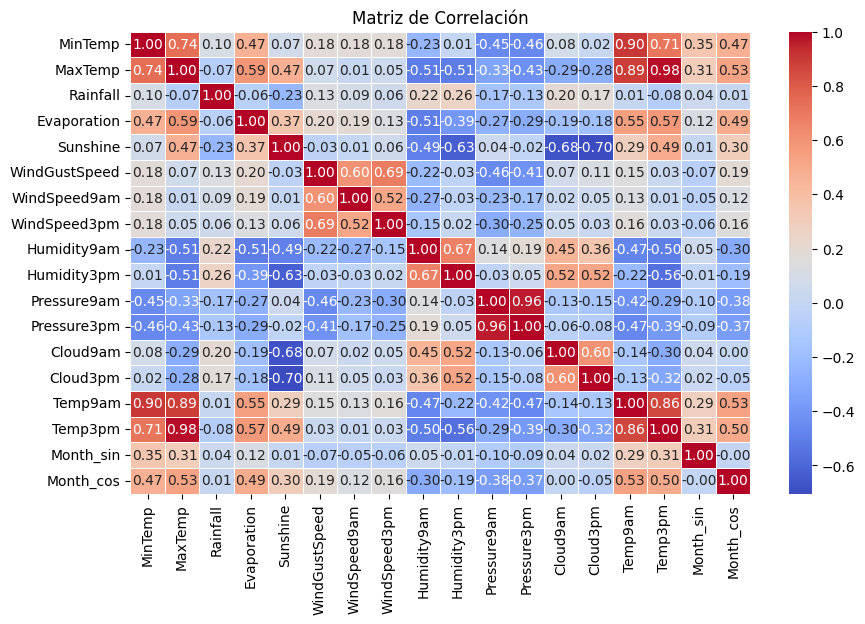

In [234]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### 2.4 Separación de variables predictoras (X) y variable objetivo (y)

En este paso separamos:

- `y`: la variable objetivo (`RainTomorrow`), que indica si llovió (Yes/No) al día siguiente.
- `X`: el resto de las variables que utilizaremos como predictoras.

Es importante que la columna `RainTomorrow` no forme parte de `X`, ya que eso implicaría "filtrar" al modelo parte de la información que queremos que aprenda a predecir (data leakage). Además, removemos `RainTomorrow` de la lista de variables categóricas (`cat_cols`) para que el preprocesamiento solo se aplique sobre las verdaderas variables de entrada.


In [235]:
# 6) Separación de la variable objetivo (y) y las predictoras (X)

y = df["RainTomorrow"]
X = df.drop(columns=["RainTomorrow"])

# Asegurarnos de que RainTomorrow no quede en la lista de categóricas para el preprocesamiento
if "RainTomorrow" in cat_cols:
    cat_cols.remove("RainTomorrow")

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (142193, 23)
Shape y: (142193,)


In [238]:
print("Columnas categóricas:")
print(cat_cols)

Columnas categóricas:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### 2.5 División estratificada en entrenamiento y test

Finalmente, dividimos el dataset en:

- **Conjunto de entrenamiento (`X_train`, `y_train`)**: utilizado para ajustar los modelos y realizar validación cruzada.
- **Conjunto de test (`X_test`, `y_test`)**: reservado para la evaluación final del modelo, simulando datos nunca vistos durante el entrenamiento.

Se utiliza un `test_size = 0.2`, es decir, el 20% de los datos se reserva para test. Además, se activa la opción `stratify=y` para que la proporción de clases (`Yes`/`No` en `RainTomorrow`) se mantenga similar tanto en el conjunto de entrenamiento como en el de test. Esto es especialmente importante en problemas donde las clases están desbalanceadas, como ocurre típicamente en datos de lluvia (hay más días sin lluvia que con lluvia).


In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42  # para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,             # 20% de los datos para test
    random_state=RANDOM_STATE, # semilla fija
    stratify=y                 # mantiene la proporción de clases en train y test
)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

print("\nDistribución de clases en train:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de clases en test:")
print(y_test.value_counts(normalize=True))


ValueError: Input contains NaN